In [1]:
%matplotlib inline

In [2]:
folder = r'C:\Users\pellan\OneDrive - CSTBGroup\Thèse stratégie carbone\Articles\Journal_papers\Carbon_budgets_Building_Environment\French_WLC_budgets'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyam
from pyam.plotting import OUTSIDE_LEGEND

<IPython.core.display.Javascript object>

# Trajectories by sectors

In [4]:
df_sectors = pd.read_excel(folder + "\Top_down_pathways.xlsx", sheet_name='Embodied_results')

In [5]:
df_sectors

,Model,Scenario,Region,Variable,Unit,2019,2030,2040,2050
0,IEA,Stated Policies Sectors,"Agriculture, hunting, forestry & fishing",Emissions|CO2eq,Mt CO2eq/yr,2.612800,2.823512,3.093611,3.355795
1,IEA,Stated Policies Sectors,Cement,Emissions|CO2eq,Mt CO2eq/yr,13.266768,14.990085,16.918083,18.123741
2,IEA,Stated Policies Sectors,Construction,Emissions|CO2eq,Mt CO2eq/yr,2.351246,2.669412,3.100370,3.516447
3,IEA,Stated Policies Sectors,Electrical & machinery,Emissions|CO2eq,Mt CO2eq/yr,1.135028,1.288617,1.496656,1.697510
4,IEA,Stated Policies Sectors,Electricity,Emissions|CO2eq,Mt CO2eq/yr,4.869018,4.341804,3.463995,2.464984
...,...,...,...,...,...,...,...,...,...
71,IEA,Net Zero Sectors,Public administration,Emissions|CO2eq,Mt CO2eq/yr,0.063873,0.030069,0.004711,0.000069
72,IEA,Net Zero Sectors,Transport,Emissions|CO2eq,Mt CO2eq/yr,4.505952,3.138291,1.026640,0.086178
73,IEA,Net Zero Sectors,Waste,Emissions|CO2eq,Mt CO2eq/yr,3.446479,2.676133,1.050676,0.061474
74,IEA,Net Zero Sectors,Water & Steam,Emissions|CO2eq,Mt CO2eq/yr,0.947208,0.395410,-0.002307,0.000061


In [6]:
df_sectors = pyam.IamDataFrame(df_sectors)
df_sectors

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : IEA (1)
 * scenario : Announced Pledges Sectors, Net Zero Sectors, ... Sustainable Development Sectors (4)
Timeseries data coordinates:
   region   : Agriculture, hunting, forestry & fishing, ... (19)
   variable : Emissions|CO2eq (1)
   unit     : Mt CO2eq/yr (1)
   year     : 2019, 2030, 2040, 2050 (4)
Meta indicators:
   exclude (bool) False (1)

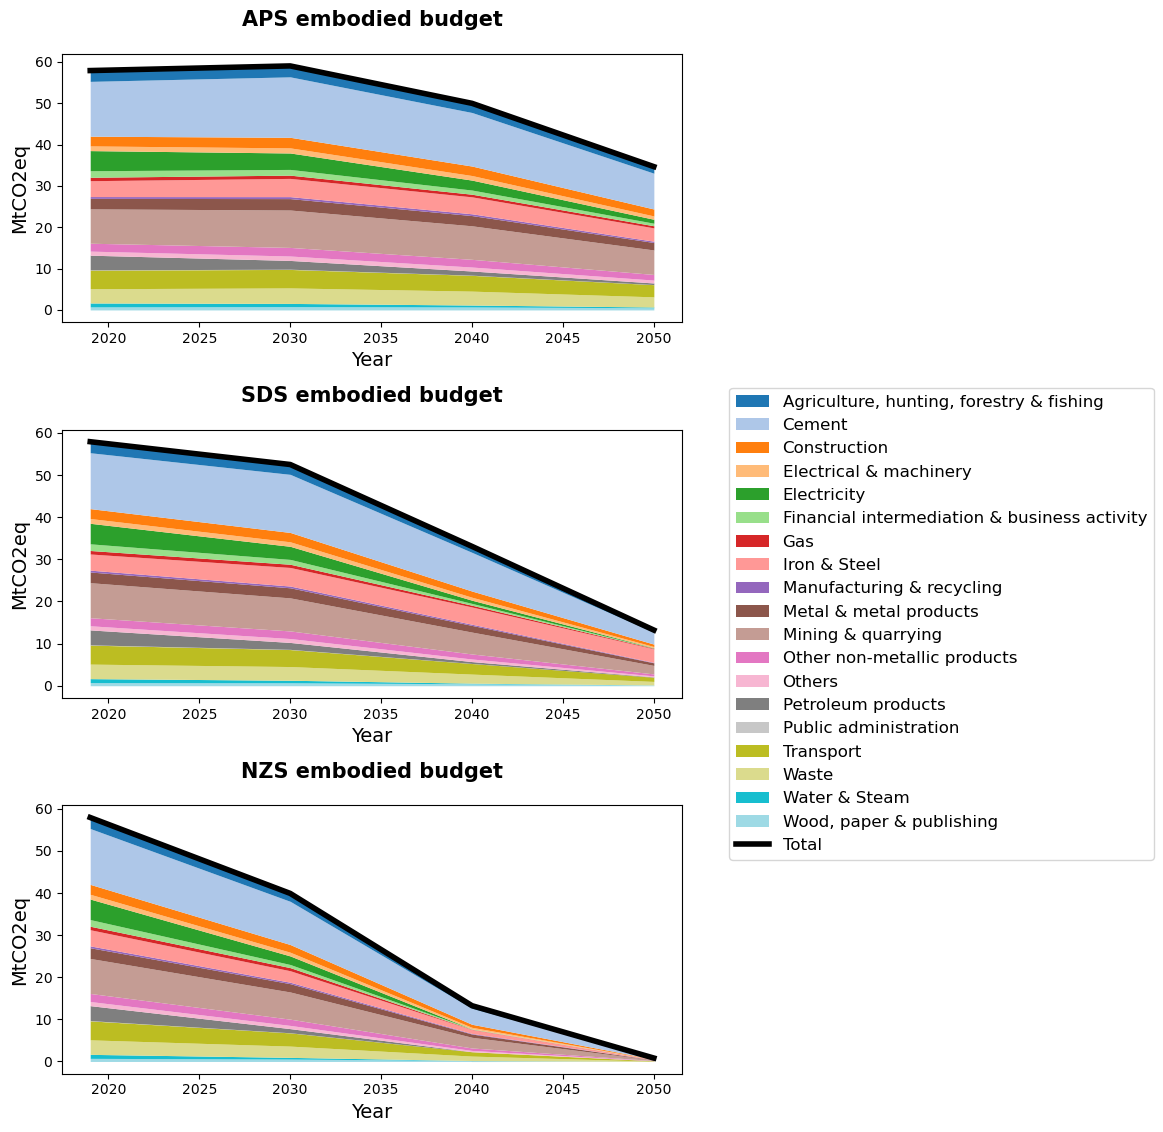

In [7]:
import matplotlib.pyplot as plt

# Filter data_AP
data_AP = df_sectors.filter(model="IEA", scenario="Announced Pledges Sectors", variable="Emissions|CO2eq").filter(
    region="World", keep=False
)

# Filter data_SD
data_SD = df_sectors.filter(model="IEA", scenario="Sustainable Development Sectors", variable="Emissions|CO2eq").filter(
    region="World", keep=False
)

# Filter data_NZS
data_NZS = df_sectors.filter(model="IEA", scenario="Net Zero Sectors", variable="Emissions|CO2eq").filter(
    region="World", keep=False
)

# Create the figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 15))

# Plot data_AP
data_AP.plot.stack(ax=ax1, stack="region", cmap="tab20", title="Announced Pledges", legend=False, total=True)

# Customize the first subplot
title_text_AP = 'APS embodied budget'
ax1.set_title(title_text_AP, fontsize=15, fontweight='bold', pad=20)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('MtCO2eq', fontsize=14)

# Plot data_SD
data_SD.plot.stack(ax=ax2, stack="region", cmap="tab20", title='Sustainable Development', legend=False, total=True)

# Customize the second subplot
title_text_SD = 'SDS embodied budget'
ax2.set_title(title_text_SD, fontsize=15, fontweight='bold', pad=20)
ax2.set_xlabel('Year', fontsize=14)
ax2.set_ylabel('MtCO2eq', fontsize=14)

# Plot data_NZS
data_NZS.plot.stack(ax=ax3, stack="region", cmap="tab20", title='Net Zero Scenario', legend=False, total=True)

# Customize the third subplot
title_text_NZS = 'NZS embodied budget'
ax3.set_title(title_text_NZS, fontsize=15, fontweight='bold', pad=20)
ax3.set_xlabel('Year', fontsize=14)
ax3.set_ylabel('MtCO2eq', fontsize=14)

# Get the handles and labels from one of the subplots
handles, labels = ax1.get_legend_handles_labels()

# Create the legend on the right side
fig.legend(handles, labels, loc='center right', fontsize=12, ncol=1, bbox_to_anchor=(1.5, 0.5))

plt.subplots_adjust(hspace=0.4, bottom=0.2)

plt.show()


# WLC pathways

In [8]:
df_wlc = pd.read_excel(folder + "\Top_down_pathways.xlsx", sheet_name='WLC_results')

In [9]:
# Interpolate missing values in each row using linear interpolation
columns_to_interpolate = df_wlc.columns[5:]
df_wlc[columns_to_interpolate] = df_wlc.groupby(['Model', 'Scenario', 'Region', 'Variable', 'Unit'])[columns_to_interpolate].apply(lambda group: group.interpolate(method='linear', axis=1))
df_wlc

C:\Users\pellan\AppData\Local\Temp\ipykernel_26244\3765986785.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_wlc[columns_to_interpolate] = df_wlc.groupby(['Model', 'Scenario', 'Region', 'Variable', 'Unit'])[columns_to_interpolate].apply(lambda group: group.interpolate(method='linear', axis=1))


,Model,Scenario,Region,Variable,Unit,2019,2020,2021,2022,2023,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,IEA,SNBC-APS,France,Direct operational GHGE,Mt CO2eq/yr,83.300000,81.446725,78.223466,75.000208,71.776949,...,24.924117,22.716937,20.509758,18.302578,16.095399,13.888219,11.681039,9.473860,7.266680,5.059501
1,IEA,SNBC-APS,France,Indirect operational GHGE,Mt CO2eq/yr,21.263654,20.415464,19.820931,19.226399,18.631866,...,7.068943,6.396107,5.723271,5.050435,4.377599,3.704763,3.031927,2.359091,1.686255,1.013419
2,IEA,SNBC-APS,France,Embodied GHGE,Mt CO2eq/yr,57.915380,58.017350,58.119319,58.221289,58.323258,...,48.454049,46.922726,45.391402,43.860078,42.328755,40.797431,39.266107,37.734784,36.203460,34.672136
3,IEA,SNBC-SDS,France,Direct operational GHGE,Mt CO2eq/yr,83.300000,81.446725,78.223466,75.000208,71.776949,...,24.924117,22.716937,20.509758,18.302578,16.095399,13.888219,11.681039,9.473860,7.266680,5.059501
4,IEA,SNBC-SDS,France,Indirect operational GHGE,Mt CO2eq/yr,21.263654,20.415464,19.820931,19.226399,18.631866,...,7.068943,6.396107,5.723271,5.050435,4.377599,3.704763,3.031927,2.359091,1.686255,1.013419
5,IEA,SNBC-SDS,France,Embodied GHGE,Mt CO2eq/yr,57.915380,57.423646,56.931912,56.440177,55.948443,...,31.084679,29.098961,27.113243,25.127525,23.141807,21.156089,19.170371,17.184653,15.198935,13.213217
6,IEA,SNBC-NZS,France,Direct operational GHGE,Mt CO2eq/yr,83.300000,81.446725,78.223466,75.000208,71.776949,...,24.924117,22.716937,20.509758,18.302578,16.095399,13.888219,11.681039,9.473860,7.266680,5.059501
7,IEA,SNBC-NZS,France,Indirect operational GHGE,Mt CO2eq/yr,21.263654,20.415464,19.820931,19.226399,18.631866,...,7.068943,6.396107,5.723271,5.050435,4.377599,3.704763,3.031927,2.359091,1.686255,1.013419
8,IEA,SNBC-NZS,France,Embodied GHGE,Mt CO2eq/yr,57.915380,56.277275,54.639170,53.001066,51.362961,...,11.994973,10.752349,9.509724,8.267100,7.024476,5.781851,4.539227,3.296603,2.053978,0.811354


In [10]:
iamdf_wlc = pyam.IamDataFrame(df_wlc)
iamdf_wlc.scenario

['SNBC-APS', 'SNBC-NZS', 'SNBC-SDS']

In [11]:
iamdf_wlc_variable = ['Direct operational GHGE', 'Indirect operational GHGE', 'Embodied GHGE']

variable_order = [
    "Direct operational GHGE",
    "Indirect operational GHGE",
    "Embodied GHGE"
]
color_mapping = {
    'Direct operational GHGE': '#D00000',
    'Indirect operational GHGE': '#FFBA08', 
    'Embodied GHGE': '#1C3144',
}
from matplotlib.colors import ListedColormap

def create_custom_colormap(color_mapping, order):
    return ListedColormap([color_mapping[var] for var in order if var in color_mapping])

cmap_custom = create_custom_colormap(color_mapping, iamdf_wlc_variable)


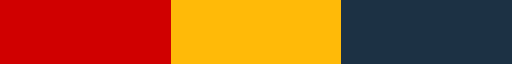

In [12]:
cmap_custom 

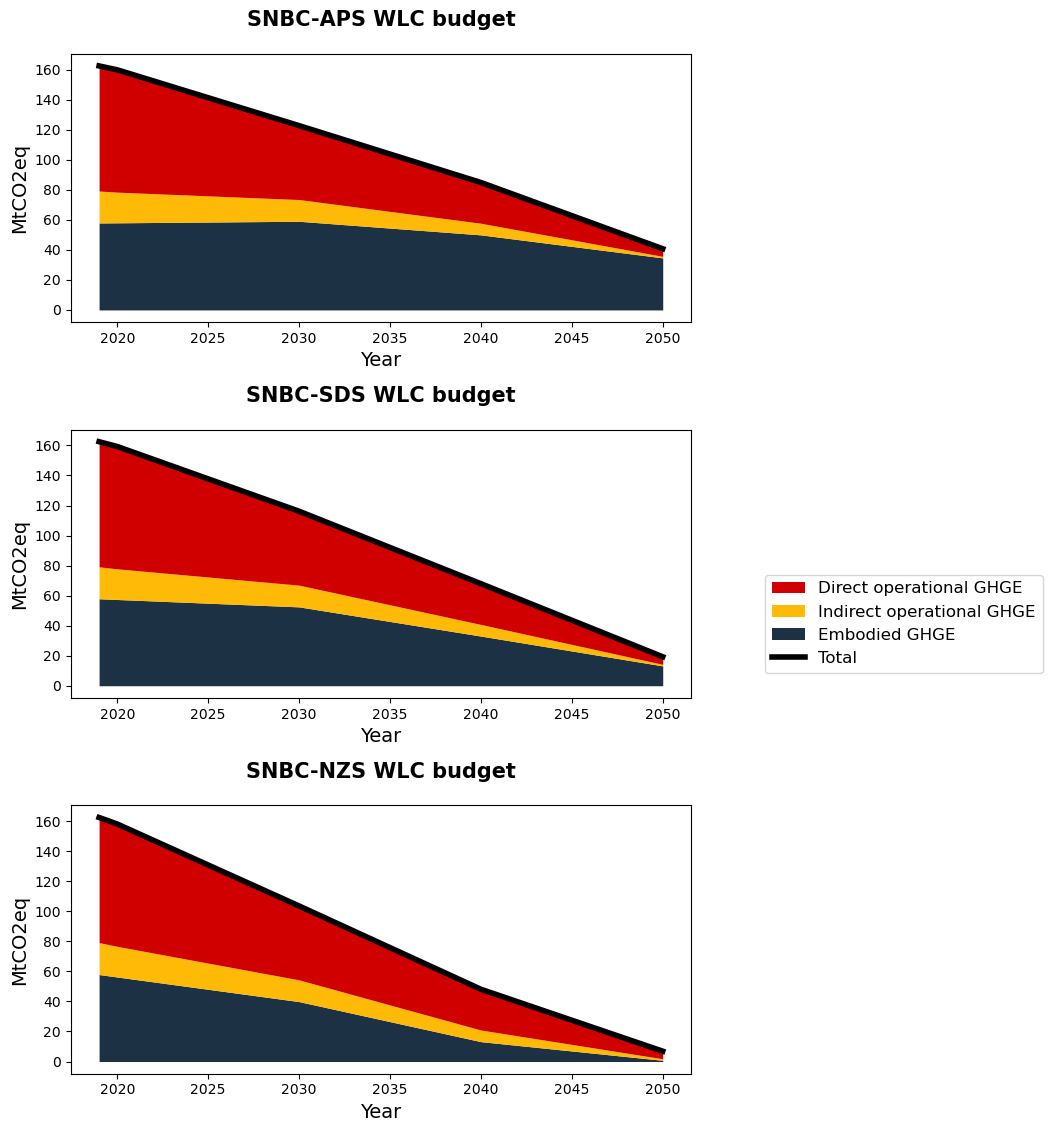

In [13]:
import matplotlib.pyplot as plt

# Filter data_AP
data_AP = iamdf_wlc.filter(scenario="SNBC-APS")

# Filter data_SD
data_SD = iamdf_wlc.filter(scenario="SNBC-SDS")

# Filter data_NZS
data_NZS = iamdf_wlc.filter(scenario="SNBC-NZS")

# Create the figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 15))

# Plot data_AP
data_AP.plot.stack(ax=ax1, stack="variable", cmap=cmap_custom, title="SNBC-APS WLC budget", legend=False, total=True, order=variable_order)

# Customize the first subplot
title_text_AP = 'SNBC-APS WLC budget'
ax1.set_title(title_text_AP, fontsize=15, fontweight='bold', pad=20)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('MtCO2eq', fontsize=14)

# Plot data_SD
data_SD.plot.stack(ax=ax2, stack="variable", cmap=cmap_custom, title='SNBC-SDS WLC budget', legend=False, total=True, order=variable_order)

# Customize the second subplot
title_text_SD = 'SNBC-SDS WLC budget'
ax2.set_title(title_text_SD, fontsize=15, fontweight='bold', pad=20)
ax2.set_xlabel('Year', fontsize=14)
ax2.set_ylabel('MtCO2eq', fontsize=14)

# Plot data_NZS
data_NZS.plot.stack(ax=ax3, stack="variable", cmap=cmap_custom, title='SNBC-NZS WLC budget', legend=False, total=True, order=variable_order)

# Customize the third subplot
title_text_NZS = 'SNBC-NZS WLC budget'
ax3.set_title(title_text_NZS, fontsize=15, fontweight='bold', pad=20)
ax3.set_xlabel('Year', fontsize=14)
ax3.set_ylabel('MtCO2eq', fontsize=14)

# Get the handles and labels from one of the subplots
handles, labels = ax1.get_legend_handles_labels()

# Create the legend on the right side
fig.legend(handles, labels, loc='center right', fontsize=12, ncol=1, bbox_to_anchor=(1.35, 0.5))

plt.subplots_adjust(hspace=0.4, bottom=0.2)

plt.show()